In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
current_directory = str(os.getcwd())
print(current_directory)
path, directory = os.path.split(current_directory)
data_file = os.path.join(str(path),"..\Datasets\iris\iris.csv")
print(data_file)

D:\Codes\BE Stuff\LP-1
D:\Codes\BE Stuff\..\Datasets\iris\iris.csv


In [3]:
df = pd.read_csv(data_file, sep=",", header=0, encoding= "latin-1")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Box Plot of the Original Features

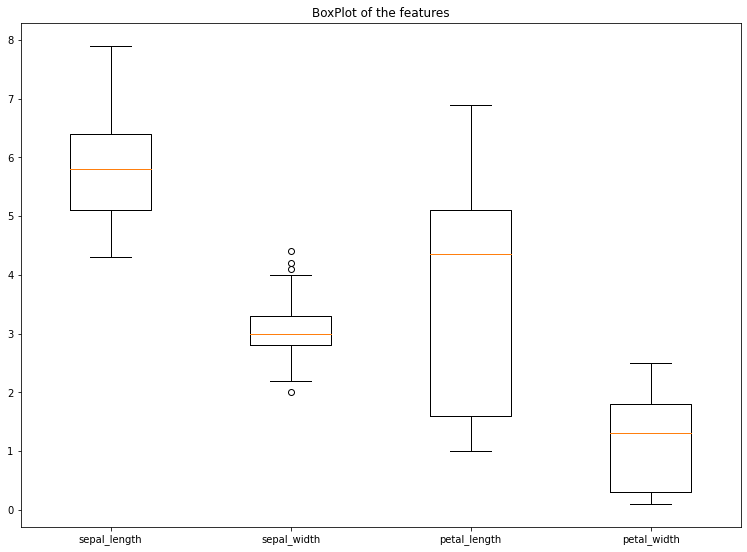

In [7]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
data = [df[col] for col in df.columns[:-1]] 
ax.set_xticklabels([col for col in df.columns[:-1]])
bp = ax.boxplot(data)
plt.title("BoxPlot of the features")
plt.show() 

### Creation of new features

In [8]:
new_df = df.copy(deep=True)

new_df['sepal_diff'] = new_df['sepal_length'] - new_df['sepal_width']
new_df['petal_diff'] = new_df['petal_length'] - new_df['petal_width']
new_df["length_diff"] = new_df['sepal_length'] - new_df['petal_length']
new_df["width_diff"] = new_df['sepal_width'] - new_df['petal_width']

In [9]:
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_diff,petal_diff,length_diff,width_diff
0,5.1,3.5,1.4,0.2,setosa,1.6,1.2,3.7,3.3
1,4.9,3.0,1.4,0.2,setosa,1.9,1.2,3.5,2.8
2,4.7,3.2,1.3,0.2,setosa,1.5,1.1,3.4,3.0
3,4.6,3.1,1.5,0.2,setosa,1.5,1.3,3.1,2.9
4,5.0,3.6,1.4,0.2,setosa,1.4,1.2,3.6,3.4


In [10]:
new_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_diff,petal_diff,length_diff,width_diff
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.789333,2.560000,2.084667,1.855333
std,0.828066,0.433594,1.764420,0.763161,0.975825,1.050152,1.118708,1.003185
min,4.300000,2.000000,1.000000,0.100000,1.000000,0.800000,0.300000,0.300000
25%,5.100000,2.800000,1.600000,0.300000,1.800000,1.400000,1.200000,1.025000
50%,5.800000,3.000000,4.350000,1.300000,3.000000,2.900000,1.700000,1.500000
75%,6.400000,3.300000,5.100000,1.800000,3.600000,3.300000,3.200000,2.975000
max,7.900000,4.400000,6.900000,2.500000,5.100000,4.700000,4.600000,4.000000


### Boxplot of the New Features

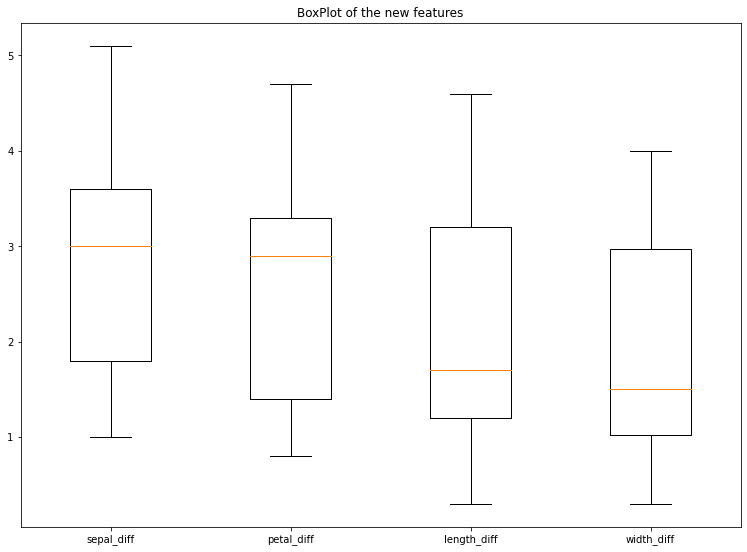

In [11]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
data = [new_df[col] for col in new_df.columns[-4:]] 
ax.set_xticklabels([col for col in new_df.columns[-4:]])
bp = ax.boxplot(data)
plt.title("BoxPlot of the new features")
plt.show() 

### Scatter Plot of the Features

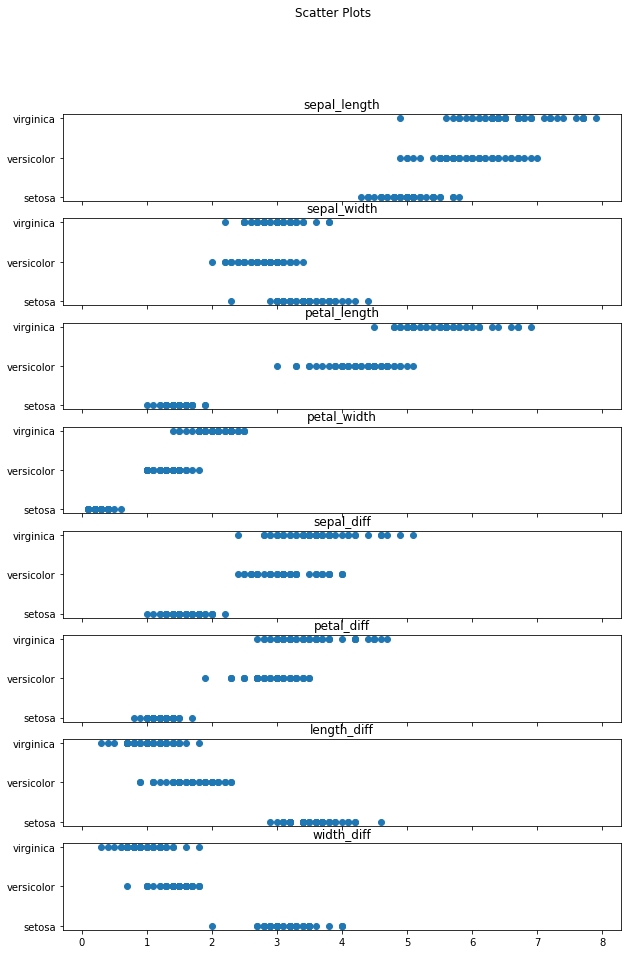

In [12]:

fig, axs = plt.subplots(8, figsize =(10, 15), sharex=True, sharey=False)
fig.suptitle('Scatter Plots')
cnt = 0
for i in range(len(new_df.columns)):
    if new_df.columns[i] == "species":
        continue
    else:
        axs[cnt].scatter(new_df[new_df.columns[i]], new_df["species"])
        axs[cnt].set_title(new_df.columns[i])
        cnt += 1


In [13]:
Y = new_df["species"]
X = new_df.drop(["species"], axis = 1)

### Heatmap of the Features

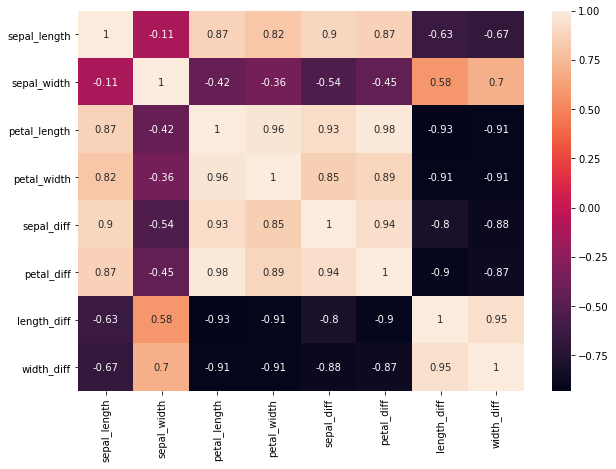

In [14]:
corr_matrix = X.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot= True, )

### Filter Method : Information gain

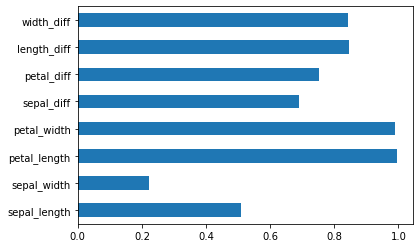

In [15]:
imp = mutual_info_classif(X,Y)
feat_imp = pd.Series(imp, X.columns)
feat_imp.plot(kind='barh')
plt.show()

### Filter Method : Variance Threshold

In [16]:
v_thresh = VarianceThreshold(threshold=0.5).fit(X)
supp = v_thresh.get_support()
print("If column is below 0.25 threshold of Variance : ")
for i in range(len(X.columns)):
    print(X.columns[i], " : ", supp[i])

If column is below 0.25 threshold of Variance : 
sepal_length  :  True
sepal_width  :  False
petal_length  :  True
petal_width  :  True
sepal_diff  :  True
petal_diff  :  True
length_diff  :  True
width_diff  :  True


### Filter Method : Mean Absoluter Difference

Text(0.5, 1.0, 'Mean Absolute Difference of Values')

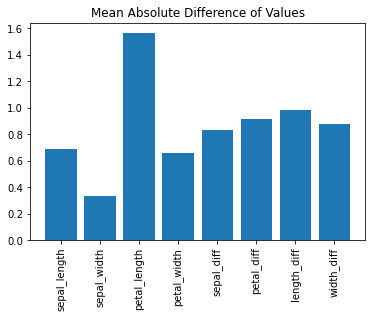

In [17]:
mean_abs_diff = np.sum(np.abs(X- np.mean(X, axis= 0)), axis = 0)/X.shape[0]
plt.bar(np.arange(X.shape[1]), mean_abs_diff)
plt.xticks(np.arange(8), labels=X.columns, rotation=90)
plt.title("Mean Absolute Difference of Values")

### Filter Method : Dispersion Ratio

Text(0.5, 1.0, 'Dispersion Ratio')

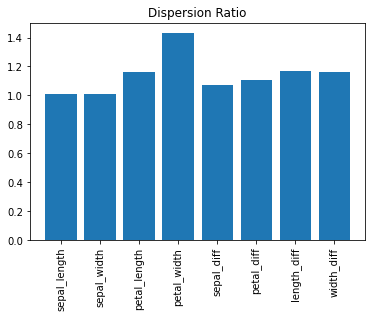

In [18]:
am = np.mean(X, axis=0)
gm = np.power(np.prod(X, axis=0), 1/X.shape[0])
disp_ratio = am/gm
plt.bar(np.arange(X.shape[1]), disp_ratio)
plt.xticks(np.arange(8), labels=X.columns, rotation=90)
plt.title("Dispersion Ratio")

### Filter Method : ANOVA Statistics

In [19]:
fs = SelectKBest(score_func=f_classif, k=4)
X_selected = fs.fit_transform(X, Y)
X_selected[:5]

array([[1.4, 0.2, 3.7, 3.3],
       [1.4, 0.2, 3.5, 2.8],
       [1.3, 0.2, 3.4, 3. ],
       [1.5, 0.2, 3.1, 2.9],
       [1.4, 0.2, 3.6, 3.4]])

### Filter Method : Chi Squared analysis

In [20]:
fs = SelectKBest(score_func=chi2, k=4)
X_selected = fs.fit_transform(X, Y)
X_selected[:5]

array([[1.4, 0.2, 3.7, 3.3],
       [1.4, 0.2, 3.5, 2.8],
       [1.3, 0.2, 3.4, 3. ],
       [1.5, 0.2, 3.1, 2.9],
       [1.4, 0.2, 3.6, 3.4]])

### Wrapper Method : Exhaustive Feature Selection

In [21]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(), 
                                min_features= 4, 
                                max_features=8, 
                                scoring='accuracy',
                                cv=2)
efs = efs.fit(X, Y)
print("Selected Features : \n", X.columns[list(efs.best_idx_)])
print("Best Score : ", efs.best_score_)

Features: 163/163

Selected Features : 
 Index(['sepal_width', 'petal_length', 'petal_width', 'sepal_diff',
       'width_diff'],
      dtype='object')
Best Score :  0.9733333333333334


### Wrapper Method : Recursive Feature Elimination

In [22]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=1)
rfe.fit(X,Y)
print("Ranking of the features by importance :")
for i in range(len(X.columns)):
    print(X.columns[i], " : ", rfe.ranking_[i])

Ranking of the features by importance :
sepal_length  :  7
sepal_width  :  8
petal_length  :  1
petal_width  :  3
sepal_diff  :  5
petal_diff  :  6
length_diff  :  4
width_diff  :  2


### Embedded Method : Random Forest Importance

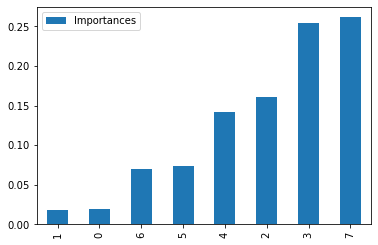

0  :  sepal_length
1  :  sepal_width
2  :  petal_length
3  :  petal_width
4  :  sepal_diff
5  :  petal_diff
6  :  length_diff
7  :  width_diff


In [23]:
model = RandomForestClassifier(n_estimators=15)

model.fit(X, Y)
imp = model.feature_importances_
feat_df = pd.DataFrame({'features' : X.columns, 'Importances' : imp})
feat_df.set_index("Importances")

feat_df = feat_df.sort_values("Importances")

feat_df.plot.bar()
plt.show()
for i in range(len(X.columns)):
    print(i, " : ", X.columns[i])

## Based on the feature selection tests, the most important features are:

### 1. petal_length
### 2. petal_width
### 3. length_diff
### 4. width_diff

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=37)

In [25]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5, max_leaf_nodes=15)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [26]:
result_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})

In [27]:
result_df

,Actual,Predicted
74,versicolor,versicolor
27,setosa,setosa
104,virginica,virginica
142,virginica,virginica
6,setosa,setosa
94,versicolor,versicolor
2,setosa,setosa
113,virginica,virginica
120,virginica,virginica
138,virginica,virginica


In [28]:
res = classification_report(y_test, y_pred)
print(res)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

